In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(open('E:/ML/decision_tree/car_evaluation.csv','rb'))
df.dtypes

vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object

Here all the columns have the datatype of object.

In [3]:
df.small.value_counts()
df['small'].value_counts()

big      576
med      576
small    575
Name: small, dtype: int64

Both the methods are same and provide same result.

In [5]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

There are no null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,low,low,3,4,big,med,unacc
freq,432,432,432,576,576,576,1209


The .describe() method only provides the max, min, std and quartiles values of int or float type variables not of object type. In Object dtype we only get the no of classes in a variable i.e. unique then top values which has max no of counts and its frequency. 

In [11]:
col=df.columns
for i in col:
    print(df[i].value_counts())
col=list(col)
col.pop()

col

low      432
med      432
high     432
vhigh    431
Name: vhigh, dtype: int64
low      432
med      432
high     432
vhigh    431
Name: vhigh.1, dtype: int64
3        432
5more    432
4        432
2        431
Name: 2, dtype: int64
4       576
more    576
2       575
Name: 2.1, dtype: int64
big      576
med      576
small    575
Name: small, dtype: int64
med     576
high    576
low     575
Name: low, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64


['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low']

This method shows the different variables with its classes and there frequency.

In [12]:
x=df.drop(['unacc'],axis=1)
y=df['unacc']
xdf=[]

Here we dropped the unacc variable from dataframe and used it as output i.e. y.

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
xdf=x.apply(LabelEncoder().fit_transform)
xd=pd.get_dummies(xdf,columns=col)
xd

,vhigh_0,vhigh_1,vhigh_2,vhigh_3,vhigh.1_0,vhigh.1_1,vhigh.1_2,vhigh.1_3,2_0,2_1,...,2_3,2.1_0,2.1_1,2.1_2,small_0,small_1,small_2,low_0,low_1,low_2
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


Now we first LabelEncoded the whole dataset x by using .apply() method and then used get dummies method to OneHotEncode the dataset. The number of columns increased and renamed with'_<no>' (like vhigh_0) 0,1,2,3.... are the no of classes in that particular variable. 

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=0.2)
xtrain.shape

(1381, 21)

Here we splitted our data into training and testing set and got the shape of xtrain.

In [16]:
from sklearn.tree import DecisionTreeClassifier as dtc
model=dtc(criterion='gini')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

The criterion we used here is gini for finding the root node.

In [22]:
ypred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)*100

96.82080924855492

The accuracy we are getting here is 96.82% the model is good enough to predict for further new inputs. 

In [21]:
model.score(xtrain,ytrain)*100

100.0

Here we can see that our model is trained in a quite well manner thus giving the accuracy of 100%.

[Text(262.2903260869565, 210.192, 'X[12] <= 0.5\ngini = 0.454\nsamples = 1381\nvalue = [304, 54, 971, 52]'),
 Text(259.37902173913045, 195.696, 'X[19] <= 0.5\ngini = 0.578\nsamples = 916\nvalue = [304, 54, 506, 52]'),
 Text(256.46771739130435, 181.2, 'X[3] <= 0.5\ngini = 0.629\nsamples = 609\nvalue = [304, 54, 199, 52]'),
 Text(205.065, 166.704, 'X[0] <= 0.5\ngini = 0.63\nsamples = 461\nvalue = [248, 54, 107, 52]'),
 Text(146.65695652173912, 152.208, 'X[5] <= 0.5\ngini = 0.645\nsamples = 315\nvalue = [167, 54, 42, 52]'),
 Text(86.61130434782609, 137.712, 'X[6] <= 0.5\ngini = 0.546\nsamples = 236\nvalue = [150, 14, 38, 34]'),
 Text(47.30869565217391, 123.216, 'X[17] <= 0.5\ngini = 0.438\nsamples = 162\nvalue = [116, 0, 34, 12]'),
 Text(30.56869565217391, 108.72, 'X[7] <= 0.5\ngini = 0.323\nsamples = 106\nvalue = [86, 0, 8, 12]'),
 Text(14.556521739130435, 94.22399999999999, 'X[1] <= 0.5\ngini = 0.437\nsamples = 52\nvalue = [37, 0, 3, 12]'),
 Text(5.822608695652174, 79.72799999999998, 'X

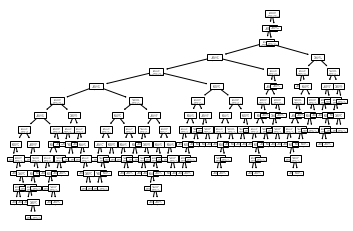

In [23]:
from sklearn import tree
tree.plot_tree(model.fit(xtrain,ytrain))

Here we got the decision tree with root node as we reduce the depth we will get more clear decision tree or we can increase the size of figure and can save it as an image or pdf. It is a tree plot which can be found in sklearn library.

In [25]:
model1=dtc(criterion='entropy',max_depth=7)
model1.fit(xtrain,ytrain)
ypred1=model1.predict(xtest)

Now we are using entropy criterion too to get the root node and predict.

In [27]:
accuracy_score(ytest,ypred1)*100

92.77456647398844

The accuracy score we get is 92.77% by using entropy critrion. 

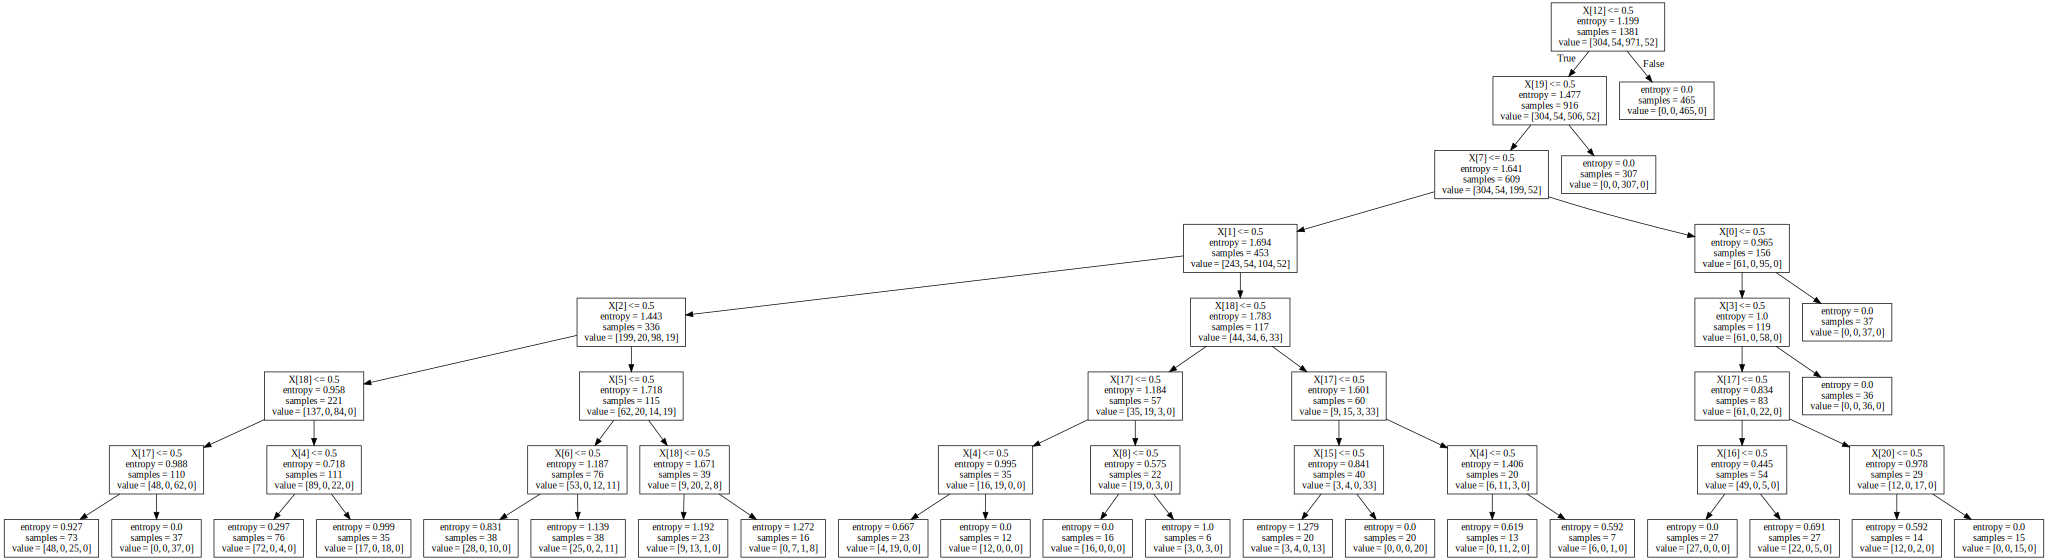

In [30]:
import graphviz
data=tree.export_graphviz(model1)
graph=graphviz.Source(data)
graph

Now we used the graphviz method to draw the decision tree it shows us more clear  graph than .tree method.

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(ytest,ypred)
cm

array([[ 74,   1,   5,   0],
       [  4,  11,   0,   0],
       [  1,   0, 237,   0],
       [  0,   0,   0,  13]], dtype=int64)

Here we got the confusion matrix which is 3X3 in size.

     

In [33]:
cr=classification_report(ytest,ypred)
cr

'              precision    recall  f1-score   support\n\n         acc       0.94      0.93      0.93        80\n        good       0.92      0.73      0.81        15\n       unacc       0.98      1.00      0.99       238\n       vgood       1.00      1.00      1.00        13\n\n    accuracy                           0.97       346\n   macro avg       0.96      0.91      0.93       346\nweighted avg       0.97      0.97      0.97       346\n'

This is the classification report where we are getting the precision, recall, f-score, accuracy and support.